# Parte 1: EDA 
El objetivo de este notebook es realizar un análisis exploratorio para entender los datos antes de pensar en realizar un modelo de predicción.
El siguiente analisis busca responder las siguientes preguntas:

-  ¿Cómo se distribuye la condición/estado de los ítems? ¿Está balanceada o desbalanceada?
- Cuantos y que tipos de datos tenemos? Hay más datos de valor ocultos?
- Influye el precio en la condición/estado del items? Items nuevos son mas costosos?
- Hay alguna relación entre cantidad inicial de un producto y su condición?
- El metodo de pago está correlacionado con el estado del articulo?
-  Que variables parecen ser las más predictivas para determinar la condición de un items?

# Configuración inicial para añadir  la raiz del pryecto al sys.path y no tener problemas con carga/importación de modulos/files

In [1]:
import os
import sys

project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

os.chdir(project_root)
print(f"Directorio de trabajo actual cambiado a: {os.getcwd()}")


Directorio de trabajo actual cambiado a: /Users/david.bayter/Documents/Private/challenge-ds-meli


# 1. Carga de los datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from config.config import configs
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

from src.utils.json_adv_utils import detect_json_columns, summarize_json_column, expand_json_column
from src.utils.aux_colums_functions import drop_column_variations, replace_empty_with_nan, get_unique_values_from_variations, summarize_nulls
from src.utils.feature_engineering import group_payment_method, group_payment_method, group_payment_method, impute_data,add_warranty_features, calcular_diferencia_meses, add_title_flags
from src.utils.convert_datatype_utils import set_datatypes
from src.utils.image_utils import plot_bivariate_cat_cat, plot_bivariate_cat_num, plot_correlation_heatmap, plot_univariate_categorical, plot_univariate_numerical 


In [3]:
df = pd.read_json(configs.PATH_DATA, lines=True)
print(df.shape)
df.sample(10)

(100000, 45)


,seller_address,warranty,sub_status,condition,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,...,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,sold_quantity,available_quantity
7129,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],220.99,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2015548469,[],...,2015-11-06 15:00:08,active,None,NaN,NaN,20,2015-09-07 15:00:08,http://articulo.mercadolibre.com.ar/MLA5142692...,0,20
79274,"{'country': {'name': 'Argentina', 'id': 'AR'},...",SI,[],new,[],160.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Efectivo', 'id': 'MLAMO', 't...",2084914166,[],...,2015-11-21 19:09:35,active,None,NaN,NaN,1,2015-09-22 19:09:35,http://articulo.mercadolibre.com.ar/MLA6711048...,0,1
1912,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],500.00,"{'local_pick_up': True, 'methods': [], 'tags':...",[],6901509173,[],...,2015-11-07 13:50:26,active,None,NaN,NaN,1,2015-09-08 13:50:26,http://articulo.mercadolibre.com.ar/MLA1088890...,1,1
15663,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],160.00,"{'local_pick_up': False, 'methods': [], 'tags'...",[],1750392679,[{'attribute_combinations': [{'value_id': '920...,...,2015-11-17 10:31:23,active,None,NaN,NaN,1,2015-09-18 10:31:23,http://articulo.mercadolibre.com.ar/MLA4176842...,0,1
69571,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],250000.00,"{'local_pick_up': False, 'methods': [], 'tags'...",[],2999172662,[],...,2015-12-05 15:26:07,active,None,NaN,NaN,1,2015-10-06 14:19:10,http://inmueble.mercadolibre.com.ar/MLA2549776...,0,1
15120,"{'country': {'name': 'Argentina', 'id': 'AR'},...",se entregan los articulos publicados.,[],used,[],30.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",7988646793,[],...,2015-10-22 15:59:34,active,None,NaN,NaN,1,2015-08-23 15:59:34,http://articulo.mercadolibre.com.ar/MLA7145288...,0,1
65522,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],40000.00,"{'local_pick_up': False, 'methods': [], 'tags'...",[],2409754292,[],...,2015-10-19 20:57:01,active,None,NaN,NaN,1,2015-08-18 19:27:05,http://terreno.mercadolibre.com.ar/MLA71378559...,0,1
24996,"{'country': {'name': 'Argentina', 'id': 'AR'},...",SI,[],new,[],11990.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2130310376,[],...,2015-10-28 02:25:35,active,EJQ5UFunkg4,NaN,NaN,1,2015-08-29 02:25:35,http://articulo.mercadolibre.com.ar/MLA3444005...,0,1
89722,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],90.00,"{'local_pick_up': True, 'methods': [], 'tags':...",[],8268370710,[],...,2015-10-31 20:18:18,active,None,NaN,NaN,1,2015-09-01 20:18:18,http://articulo.mercadolibre.com.ar/MLA9690609...,0,1
62507,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],400.00,"{'local_pick_up': True, 'free_methods': [{'rul...","[{'description': 'Transferencia bancaria', 'id...",1956888147,[],...,2015-11-17 19:34:32,active,None,NaN,NaN,1,2015-09-18 19:34:32,http://articulo.mercadolibre.com.ar/MLA2162679...,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 45 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   seller_address                    100000 non-null  object        
 1   warranty                          39104 non-null   object        
 2   sub_status                        100000 non-null  object        
 3   condition                         100000 non-null  object        
 4   deal_ids                          100000 non-null  object        
 5   base_price                        100000 non-null  float64       
 6   shipping                          100000 non-null  object        
 7   non_mercado_pago_payment_methods  100000 non-null  object        
 8   seller_id                         100000 non-null  int64         
 9   variations                        100000 non-null  object        
 10  site_id                          

condition
new     0.53758
used    0.46242
Name: proportion, dtype: float64


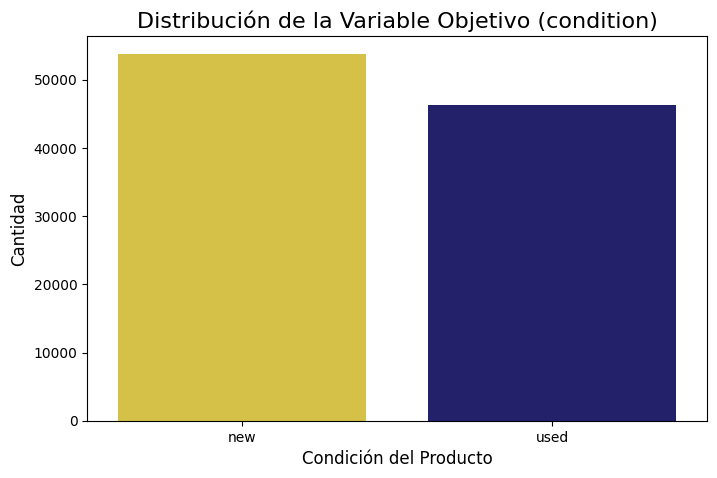

El dataset muestra una distribución 'balanceada' entre las clases used y new. Esto favorecerá el análisis y construcción del modelo posterior


In [5]:
print(df.condition.value_counts(normalize=True))
plt.figure(figsize=(8, 5))
sns.countplot(x='condition', data=df, palette=['#eed130', '#171576'])
plt.title('Distribución de la Variable Objetivo (condition)', fontsize=16)
plt.xlabel('Condición del Producto', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
print("El dataset muestra una distribución 'balanceada' entre las clases used y new. Esto favorecerá el análisis y construcción del modelo posterior")


 ##### Hallazgos
 Al cargar los datos y como primera impresión del dataset, notamos que de las 44 características, algunas de ellas tienen campos aninados o JSON como información.  Con la finalidad de poder trabajar con datos tabulares para continuar con el análisis, buscaremos convertir estos campos anidados en features planas, expandiendo el JSON.  Sin embargo, no todas las características necesariamente deben ser expandidas y convertirse en columnas, sino, solo aquellas que tengan información de valor predictivo para nuestro target "condition column".  Para ello, antes de definir que columnas extraer, evaluaremos la información que contienen, identificando las columnas que tengan tipo de datos (List o Dict o Str JSON) y  realizaremos un análisis de su contenido

# 2. Analizando DATA


## 2.1  Detectando y Analizando contenido de las columnas JSON

In [6]:
raw_json_cols = detect_json_columns(df)
print("Columnas JSON encontradas:", raw_json_cols)

print("Excluyendo columnas que si bien tienen datos JSON, revisada su contenido fueron encontradas como irrelevantes para el analisis al contener información no muy estructurada o demasiado ruido que dificulta el análisis.")
col_to_exclude = ['deal_ids', 'variations', 'attributes', 'coverage_areas', 'descriptions', 'pictures']

json_cols = [col for col in raw_json_cols if col not in col_to_exclude]
print("Columnas JSON a analizar:", json_cols)

Columnas JSON encontradas: ['seller_address', 'sub_status', 'deal_ids', 'shipping', 'non_mercado_pago_payment_methods', 'variations', 'attributes', 'tags', 'coverage_areas', 'descriptions', 'pictures']
Excluyendo columnas que si bien tienen datos JSON, revisada su contenido fueron encontradas como irrelevantes para el analisis al contener información no muy estructurada o demasiado ruido que dificulta el análisis.
Columnas JSON a analizar: ['seller_address', 'sub_status', 'shipping', 'non_mercado_pago_payment_methods', 'tags']


In [7]:
df_concatenated = pd.DataFrame()
for col in json_cols:

    summary = summarize_json_column(df[col])
    print(f"Resumen de la columna {col}:")
    print(summary)


    df_flat = expand_json_column(df, col, prefix=col).drop(columns=df.columns, errors='ignore')
    
    if df_flat.empty:
        print(f"La columna {col} no contiene datos para expandir.")
        continue
    display(df_flat.sample(10))
    print("\n")
    display(df_flat.info())
    print("\n")
    display(df_flat.describe())
    
    df_concatenated = pd.concat([df_concatenated, df_flat], axis=1)
    print("\n" + "="*50 + "\n")

    

Resumen de la columna seller_address:
{'total_rows': 100000, 'non_null_rows': 100000, 'unique_values': 4004, 'top_n': [({'city': {'id': '', 'name': 'CABA'}, 'country': {'id': 'AR', 'name': 'Argentina'}, 'state': {'id': 'AR-C', 'name': 'Capital Federal'}}, 4082), ({'city': {'id': '', 'name': 'Capital Federal'}, 'country': {'id': 'AR', 'name': 'Argentina'}, 'state': {'id': 'AR-C', 'name': 'Capital Federal'}}, 3334), ({'city': {'id': 'TUxBQlBBTDI1MTVa', 'name': 'Palermo'}, 'country': {'id': 'AR', 'name': 'Argentina'}, 'state': {'id': 'AR-C', 'name': 'Capital Federal'}}, 3305), ({'city': {'id': '', 'name': 'Buenos Aires'}, 'country': {'id': 'AR', 'name': 'Argentina'}, 'state': {'id': 'AR-C', 'name': 'Capital Federal'}}, 3138), ({'city': {'id': 'TUxBQkNBQjM4MDda', 'name': 'Caballito'}, 'country': {'id': 'AR', 'name': 'Argentina'}, 'state': {'id': 'AR-C', 'name': 'Capital Federal'}}, 2909), ({'city': {'id': 'TUxBQkJFTDcyNTJa', 'name': 'Belgrano'}, 'country': {'id': 'AR', 'name': 'Argentina'}

,seller_address_country.name,seller_address_country.id,seller_address_state.name,seller_address_state.id,seller_address_city.name,seller_address_city.id
73517,Argentina,AR,Buenos Aires,AR-B,Quilmes,TUxBQ1FVSWI1MzY
78175,Argentina,AR,Buenos Aires,AR-B,Castelar,
18245,Argentina,AR,Capital Federal,AR-C,Mataderos,TUxBQk1BVDMwMDJa
587,Argentina,AR,Capital Federal,AR-C,Belgrano R,TUxBQkJFTDU5NzNa
59214,Argentina,AR,Buenos Aires,AR-B,Carapachay,
83201,Argentina,AR,Capital Federal,AR-C,CAPITAL FEDERAL,
40246,Argentina,AR,Capital Federal,AR-C,Barrio Norte,
99867,Argentina,AR,Capital Federal,AR-C,CAPITAL FEDERAL CABA,
14786,Argentina,AR,Córdoba,AR-X,Córdoba,
72037,Argentina,AR,Capital Federal,AR-C,Villa Crespo,TUxBQlZJTDQyMjBa




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   seller_address_country.name  100000 non-null  object
 1   seller_address_country.id    100000 non-null  object
 2   seller_address_state.name    100000 non-null  object
 3   seller_address_state.id      100000 non-null  object
 4   seller_address_city.name     100000 non-null  object
 5   seller_address_city.id       100000 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


None

,seller_address_country.name,seller_address_country.id,seller_address_state.name,seller_address_state.id,seller_address_city.name,seller_address_city.id
count,100000,100000,100000,100000,100000,100000
unique,2,2,25,25,3656,295
top,Argentina,AR,Capital Federal,AR-C,CABA,
freq,99997,99997,57854,57854,4098,54574




Resumen de la columna sub_status:
{'total_rows': 100000, 'non_null_rows': 100000, 'unique_values': 4, 'top_n': [([], 99014), (['suspended'], 966), (['expired'], 13), (['deleted'], 7)]}


,sub_status_deleted,sub_status_expired,sub_status_suspended
91285,0,0,0
69788,0,0,0
75905,0,0,0
62529,0,0,0
72711,0,0,0
58733,0,0,0
62214,0,0,0
73657,0,0,0
9918,0,0,0
12952,0,0,0




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   sub_status_deleted    100000 non-null  int64
 1   sub_status_expired    100000 non-null  int64
 2   sub_status_suspended  100000 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


None

,sub_status_deleted,sub_status_expired,sub_status_suspended
count,100000.000000,100000.000000,100000.00000
mean,0.000070,0.000130,0.00966
std,0.008366,0.011401,0.09781
min,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.00000




Resumen de la columna shipping:
{'total_rows': 100000, 'non_null_rows': 100000, 'unique_values': 40, 'top_n': [({'dimensions': None, 'free_shipping': False, 'local_pick_up': True, 'methods': [], 'mode': 'me2', 'tags': []}, 41518), ({'dimensions': None, 'free_shipping': False, 'local_pick_up': True, 'methods': [], 'mode': 'not_specified', 'tags': []}, 32809), ({'dimensions': None, 'free_shipping': False, 'local_pick_up': False, 'methods': [], 'mode': 'not_specified', 'tags': []}, 12338), ({'dimensions': None, 'free_shipping': False, 'local_pick_up': False, 'methods': [], 'mode': 'me2', 'tags': []}, 6695), ({'dimensions': None, 'free_shipping': False, 'local_pick_up': True, 'methods': [], 'mode': 'custom', 'tags': []}, 2941), ({'dimensions': None, 'free_methods': [{'id': 73328, 'rule': {'free_mode': 'country', 'value': None}}], 'free_shipping': True, 'local_pick_up': True, 'mode': 'me2', 'tags': []}, 2183), ({'dimensions': None, 'free_methods': [{'id': 73328, 'rule': {'free_mode': 'cou

,shipping_local_pick_up,shipping_methods,shipping_tags,shipping_free_shipping,shipping_mode,shipping_dimensions,shipping_free_methods
54712,True,[],[],False,me2,None,NaN
24420,True,[],[],False,custom,None,NaN
34903,True,[],[],False,custom,None,NaN
22434,True,[],[],False,me2,None,NaN
68030,True,[],[],False,me2,None,NaN
50494,True,[],[],False,not_specified,None,NaN
48381,True,[],[],False,me2,None,NaN
64057,False,[],[],False,not_specified,None,NaN
26959,False,[],[],False,not_specified,None,NaN
57880,True,[],[],False,not_specified,None,NaN




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   shipping_local_pick_up  100000 non-null  bool  
 1   shipping_methods        96992 non-null   object
 2   shipping_tags           100000 non-null  object
 3   shipping_free_shipping  100000 non-null  bool  
 4   shipping_mode           100000 non-null  object
 5   shipping_dimensions     23 non-null      object
 6   shipping_free_methods   3006 non-null    object
dtypes: bool(2), object(5)
memory usage: 4.0+ MB


None

,shipping_local_pick_up,shipping_methods,shipping_tags,shipping_free_shipping,shipping_mode,shipping_dimensions,shipping_free_methods
count,100000,96992,100000,100000,100000,23,3006
unique,2,1,3,2,4,13,5
top,True,[],[],False,me2,"33x20x12,300","[{'rule': {'value': None, 'free_mode': 'countr..."
freq,79561,96992,99931,96984,51255,4,2955




Resumen de la columna non_mercado_pago_payment_methods:
{'total_rows': 100000, 'non_null_rows': 100000, 'unique_values': 188, 'top_n': [([], 30559), ([{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}], 22536), ([{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Tarjeta de crédito', 'id': 'MLAOT', 'type': 'N'}, {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}], 20776), ([{'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}], 14325), ([{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Acordar con el comprador', 'id': 'MLAWC', 'type': 'G'}, {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}], 2566), ([{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Tarjeta de crédito', 'id': 'MLAOT', 'type': 'N'}, {'description': 'Acordar con el comprador', 'id': 'MLAWC', 'type': 'G'}, {'descriptio

,non_mercado_pago_payment_methods_description0,non_mercado_pago_payment_methods_id0,non_mercado_pago_payment_methods_type0,non_mercado_pago_payment_methods_description1,non_mercado_pago_payment_methods_id1,non_mercado_pago_payment_methods_type1,non_mercado_pago_payment_methods_description2,non_mercado_pago_payment_methods_id2,non_mercado_pago_payment_methods_type2,non_mercado_pago_payment_methods_description3,...,non_mercado_pago_payment_methods_type8,non_mercado_pago_payment_methods_description9,non_mercado_pago_payment_methods_id9,non_mercado_pago_payment_methods_type9,non_mercado_pago_payment_methods_description10,non_mercado_pago_payment_methods_id10,non_mercado_pago_payment_methods_type10,non_mercado_pago_payment_methods_description11,non_mercado_pago_payment_methods_id11,non_mercado_pago_payment_methods_type11
60982,Transferencia bancaria,MLATB,G,Efectivo,MLAMO,G,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25485,Transferencia bancaria,MLATB,G,Efectivo,MLAMO,G,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26350,Transferencia bancaria,MLATB,G,Tarjeta de crédito,MLAOT,N,Efectivo,MLAMO,G,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40573,Transferencia bancaria,MLATB,G,Efectivo,MLAMO,G,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66086,Transferencia bancaria,MLATB,G,Tarjeta de crédito,MLAOT,N,Acordar con el comprador,MLAWC,G,Efectivo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5850,Transferencia bancaria,MLATB,G,Efectivo,MLAMO,G,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49696,Transferencia bancaria,MLATB,G,Efectivo,MLAMO,G,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   non_mercado_pago_payment_methods_description0   69441 non-null  object
 1   non_mercado_pago_payment_methods_id0            69441 non-null  object
 2   non_mercado_pago_payment_methods_type0          69441 non-null  object
 3   non_mercado_pago_payment_methods_description1   53232 non-null  object
 4   non_mercado_pago_payment_methods_id1            53232 non-null  object
 5   non_mercado_pago_payment_methods_type1          53232 non-null  object
 6   non_mercado_pago_payment_methods_description2   28020 non-null  object
 7   non_mercado_pago_payment_methods_id2            28020 non-null  object
 8   non_mercado_pago_payment_methods_type2          28020 non-null  object
 9   non_mercado_pago_payment_methods_description3  

None

,non_mercado_pago_payment_methods_description0,non_mercado_pago_payment_methods_id0,non_mercado_pago_payment_methods_type0,non_mercado_pago_payment_methods_description1,non_mercado_pago_payment_methods_id1,non_mercado_pago_payment_methods_type1,non_mercado_pago_payment_methods_description2,non_mercado_pago_payment_methods_id2,non_mercado_pago_payment_methods_type2,non_mercado_pago_payment_methods_description3,...,non_mercado_pago_payment_methods_type8,non_mercado_pago_payment_methods_description9,non_mercado_pago_payment_methods_id9,non_mercado_pago_payment_methods_type9,non_mercado_pago_payment_methods_description10,non_mercado_pago_payment_methods_id10,non_mercado_pago_payment_methods_type10,non_mercado_pago_payment_methods_description11,non_mercado_pago_payment_methods_id11,non_mercado_pago_payment_methods_type11
count,69441,69441,69441,53232,53232,53232,28020,28020,28020,3536,...,452,352,352,352,281,281,281,75,75,75
unique,11,11,4,12,12,4,11,11,4,12,...,2,4,4,2,3,3,2,1,1,1
top,Transferencia bancaria,MLATB,G,Efectivo,MLAMO,G,Efectivo,MLAMO,G,Efectivo,...,G,Efectivo,MLAMO,G,American Express,MLAAM,C,American Express,MLAAM,C
freq,50335,50335,67207,25320,25320,29499,24026,24026,27597,2415,...,358,210,210,211,205,205,205,75,75,75




Resumen de la columna tags:
{'total_rows': 100000, 'non_null_rows': 100000, 'unique_values': 8, 'top_n': [(['dragged_bids_and_visits'], 72551), ([], 24910), (['good_quality_thumbnail', 'dragged_bids_and_visits'], 1330), (['dragged_visits'], 516), (['good_quality_thumbnail'], 392), (['dragged_visits', 'free_relist'], 285), (['poor_quality_thumbnail', 'dragged_bids_and_visits'], 11), (['poor_quality_thumbnail'], 5)]}


,tags_dragged_bids_and_visits,tags_dragged_visits,tags_free_relist,tags_good_quality_thumbnail,tags_poor_quality_thumbnail
55701,1,0,0,0,0
76314,0,0,0,0,0
86841,1,0,0,0,0
11844,1,0,0,0,0
48554,0,0,0,0,0
17145,1,0,0,0,0
95450,1,0,0,0,0
85994,1,0,0,1,0
83895,1,0,0,0,0
50220,0,0,0,0,0




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   tags_dragged_bids_and_visits  100000 non-null  int64
 1   tags_dragged_visits           100000 non-null  int64
 2   tags_free_relist              100000 non-null  int64
 3   tags_good_quality_thumbnail   100000 non-null  int64
 4   tags_poor_quality_thumbnail   100000 non-null  int64
dtypes: int64(5)
memory usage: 3.8 MB


None

,tags_dragged_bids_and_visits,tags_dragged_visits,tags_free_relist,tags_good_quality_thumbnail,tags_poor_quality_thumbnail
count,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000
mean,0.738920,0.00801,0.00285,0.017220,0.000160
std,0.439226,0.08914,0.05331,0.130091,0.012648
min,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.00000,0.00000,0.000000,0.000000
50%,1.000000,0.00000,0.00000,0.000000,0.000000
75%,1.000000,0.00000,0.00000,0.000000,0.000000
max,1.000000,1.00000,1.00000,1.000000,1.000000


### Conclusion del análisis de las columnas JSON
Luego de analizar detalladamente cada una de las columnas JSON, estos fueron los hallazgos:
- seller_address: Contiene información respecto a País, Estado, Ciudad y sus IDs. Quizá Estado o Ciudad pueda ser RELEVANTE.
- sub_status: Información sobre estatus de un producto. Puede ser RELEVANTE.
- deal_ids: Información de IDs. >99% listas vacías. DESCARTADA
- shipping: Contiene información sobre shipping. Si un producto es usado, posiblemente local_pick_up no sea permitido. RELEVANTE
- non_mercado_pago_payment_methods: Contiene informació sobre metodos de pago aceptado. Si un producto es usado, posiblmente no se acepte efectivo/contra-entrega. RELEVANTE
- variations: Contiene información de colores, atributos, entre otros.  No parece ser información relevante y demasiado extensa para analizar en el periodo de tiempo. DESCARTADA
- attributes: Contine información sobre genero, ficha técnica, season, entre otros. No parece ser información relevante y demasiado extensa para analizar en el periodo de tiempo. DESCARTADA 
- tags: Contiene información sobre los items y su comportamiento. Si fue republicado,vistas, etc. RELEVANTE 
- coverage_areas: Al parecer solo contiene listas vacías. DESCARTADA
- descriptions: Contiene información de IDs de los productos. Al no poser información relevante (97% son valores unicos, el resto null) DESCARTADA
- pictures: Contiene bastante información de metadata de las imagenes, sin embargo irrelevante para el alcance del modelo predictivo. DESCARTADA 

### 2.1.1 Eliminando información No relevante de los JSON extendidos

Una vez se logró expandir los JSON considerados relevantes, algunos de ellos contienen información que sigue siendo ruido para nuestros análisis posteriores, principalmente las columnas que vienen de non_mercado_pago_payment_methods, a excepción de ...payment_methods_description, la cual tiene información útil sobre el tipo de pago aceptado por los vendedores. 
Una hipotesis que surge en este punto y será comprobada más adelante, es que, aquellos vendedores que tienen listados artículos usados, muy probablemente no acepten métodos de pagos que permitan "Contracargo"

Se eliminarán las columnas no relevanes para el análisis, puntualmente aquellas que tienen codifiaciones dee IDs o similares.

In [8]:
no_relevant_columns = ['non_mercado_pago_payment_methods_id', 'non_mercado_pago_payment_methods_type', 'seller_address_country.id',  'seller_address_state.id',  'seller_address_city.id']
df_cleaned_concat = df_concatenated.copy()
for col in no_relevant_columns:
    df_cleaned_concat = drop_column_variations(df_cleaned_concat, col)


df_cleaned_concat.shape

Eliminando 12 columnas que comienzan con 'non_mercado_pago_payment_methods_id'...
Eliminando 12 columnas que comienzan con 'non_mercado_pago_payment_methods_type'...
Eliminando 1 columnas que comienzan con 'seller_address_country.id'...
Eliminando 1 columnas que comienzan con 'seller_address_state.id'...
Eliminando 1 columnas que comienzan con 'seller_address_city.id'...


(100000, 30)

### 2.1.2 Agrupando información importante distribuida en variaciones numéricas de columnas

In [9]:
payment_methods = get_unique_values_from_variations(df_cleaned_concat, 'non_mercado_pago_payment_methods_description')
payment_methods

['Mastercard Maestro',
 'American Express',
 'Acordar con el comprador',
 'Tarjeta de crédito',
 'Contra reembolso',
 'Giro postal',
 'Transferencia bancaria',
 'Efectivo',
 'MasterCard',
 'Cheque certificado',
 'Visa Electron',
 'Diners',
 'Visa',
 'MercadoPago']

In [10]:
df_cleaned_concat_enc = group_payment_method(
    df_cleaned_concat, 
    'non_mercado_pago_payment_methods_description'
)

Proceso completado. Se eliminaron 12 columnas originales y se crearon 7 nuevas columnas de grupos de pago.


In [11]:
df_concat_raw = pd.concat([df.drop(columns=raw_json_cols, errors='ignore'), df_cleaned_concat_enc], axis=1)
df_concat_raw.shape

(100000, 59)

## 2.2 Continuando con el Análisis ahora con todas las columnas del dataframe original + las relevantes extendidas de columnas JSON

### 2.2.1 Validando valores nulos

In [12]:
df_concat_raw = replace_empty_with_nan(df_concat_raw)


In [13]:
summarize_nulls(df_concat_raw)

,Cantidad de Nulos,% de Nulos,% de Valores
catalog_product_id,99989,99.989,0.011
shipping_dimensions,99977,99.977,0.023
shipping_tags,99931,99.931,0.069
original_price,99857,99.857,0.143
official_store_id,99182,99.182,0.818
video_id,97015,97.015,2.985
shipping_free_methods,96994,96.994,3.006
warranty,60930,60.930,39.070
parent_item_id,23011,23.011,76.989
thumbnail,789,0.789,99.211


In [14]:
list_col_drop = ['catalog_product_id','shipping_dimensions','shipping_tags', 'original_price', 'official_store_id', 'video_id' , 'parent_item_id', 'thumbnail','secure_thumbnail', 'permalink', 'subtitle', 'seller_address_country.name'
                 ,'differential_pricing','shipping_methods', 'listing_source', 'site_id', 'id']

for col in list_col_drop:
    df_concat_raw = drop_column_variations(df_concat_raw, col)

df_concat_raw.shape
        

Eliminando 1 columnas que comienzan con 'catalog_product_id'...
Eliminando 1 columnas que comienzan con 'shipping_dimensions'...
Eliminando 1 columnas que comienzan con 'shipping_tags'...
Eliminando 1 columnas que comienzan con 'original_price'...
Eliminando 1 columnas que comienzan con 'official_store_id'...
Eliminando 1 columnas que comienzan con 'video_id'...
Eliminando 1 columnas que comienzan con 'parent_item_id'...
Eliminando 1 columnas que comienzan con 'thumbnail'...
Eliminando 1 columnas que comienzan con 'secure_thumbnail'...
Eliminando 1 columnas que comienzan con 'permalink'...
Eliminando 1 columnas que comienzan con 'subtitle'...
Eliminando 1 columnas que comienzan con 'seller_address_country.name'...
Eliminando 1 columnas que comienzan con 'differential_pricing'...
Eliminando 1 columnas que comienzan con 'shipping_methods'...
Eliminando 1 columnas que comienzan con 'listing_source'...
Eliminando 1 columnas que comienzan con 'site_id'...
Eliminando 1 columnas que comienzan

(100000, 42)

In [15]:
summarize_nulls(df_concat_raw)


,Cantidad de Nulos,% de Nulos,% de Valores
shipping_free_methods,96994,96.994,3.006
warranty,60930,60.930,39.070
seller_address_city.name,4,0.004,99.996
seller_address_state.name,3,0.003,99.997


In [16]:
df_concat_imputed = impute_data(df_concat_raw)
df_concat_imputed.isna().sum()

Procesando columna 'warranty' con estrategia 'constant'...
Procesando columna 'seller_address_city.name' con estrategia 'mode'...
Procesando columna 'seller_address_state.name' con estrategia 'mode'...
Procesando columna 'shipping_free_methods' con estrategia 'binary_presence'...


warranty                              0
condition                             0
base_price                            0
seller_id                             0
listing_type_id                       0
price                                 0
buying_mode                           0
category_id                           0
last_updated                          0
international_delivery_mode           0
accepts_mercadopago                   0
currency_id                           0
title                                 0
automatic_relist                      0
date_created                          0
stop_time                             0
status                                0
initial_quantity                      0
start_time                            0
sold_quantity                         0
available_quantity                    0
seller_address_state.name             0
seller_address_city.name              0
sub_status_deleted                    0
sub_status_expired                    0


# 3. Feature Engineering

En este punto ya hemos realizado un análisis pre-liminar de las características mñas relevantes, hemos limpiado un poco nuestra fuente de datos y consolidado la información que consideramos importante para la fase de modelación. Ahora, vamos a crear algunas carácterísticas, utilizando las columnas de fechas que disponemos. Adicional, también veo valor en la columna warranty, que bien es un tipo de dato string abierto, intentaremos reducir sus opciones. Del mismo modo, construiremos dos nuevas columnas a partir de la columna title

In [17]:
df_concat_imputed.value_counts('warranty').head(50).reset_index()['warranty']

0                                         No especifica
1                                                    Sí
2                                          Sin garantía
3                                                    SI
4                                               6 meses
5                                               6 MESES
6                                                    Si
7                                                    si
8                                         MI REPUTACION
9                                               3 meses
10                                  3 meses de garantia
11                                              3 MESES
12                                             12 meses
13                                   MIS CALIFICACIONES
14    TODOS MIS PRODUCTOS ESTAN 100 % GARANTIZADOS,D...
15                                                1 año
16    Oferta con confianza - Revisa nuestras Calific...
17    La garantia solo responde en casos de fall

Se tiene la columna warranty que es de tipo texto abierta, donde los sellers escriben las caracteristicas de la garantía para sus productos. A través de está columna se intentará crear una métrica que determine 4 clases. 
- con_garantia    : bool
- sin_garantia    : bool
- reputacion      : bool
- _3_6_meses      : bool   

In [18]:
df_procesado = add_warranty_features(df_concat_imputed, col='warranty', drop_original=True)


In [19]:
df_procesado = calcular_diferencia_meses(df_procesado)


In [20]:
list_col_drop = ['date_created','stop_time', 'start_time', 'last_updated']

for col in list_col_drop:
    df_procesado = drop_column_variations(df_procesado, col)

df_procesado.shape

Eliminando 1 columnas que comienzan con 'date_created'...
Eliminando 1 columnas que comienzan con 'stop_time'...
Eliminando 1 columnas que comienzan con 'start_time'...
Eliminando 1 columnas que comienzan con 'last_updated'...


(100000, 43)

In [21]:
df_procesado_flat = add_title_flags(df_procesado, title_col='title')


In [22]:
df_procesado_flat.columns

Index(['condition', 'base_price', 'seller_id', 'listing_type_id', 'price',
       'buying_mode', 'category_id', 'international_delivery_mode',
       'accepts_mercadopago', 'currency_id', 'automatic_relist', 'status',
       'initial_quantity', 'sold_quantity', 'available_quantity',
       'seller_address_state.name', 'seller_address_city.name',
       'sub_status_deleted', 'sub_status_expired', 'sub_status_suspended',
       'shipping_local_pick_up', 'shipping_free_shipping', 'shipping_mode',
       'shipping_free_methods', 'tags_dragged_bids_and_visits',
       'tags_dragged_visits', 'tags_free_relist',
       'tags_good_quality_thumbnail', 'tags_poor_quality_thumbnail',
       'payment_group_cash', 'payment_group_check_or_money_order',
       'payment_group_credit_card', 'payment_group_debit_card',
       'payment_group_mercado_pago', 'payment_group_other',
       'payment_group_transfer', 'sin_garantia', 'reputacion', '_3_6_meses',
       'con_garantia', 'warranty_group', 'diferenc

In [23]:
df_convert = set_datatypes(df_procesado_flat, numericas=configs.col_numericas, categoricas_nom=configs.col_categoricas, booleanas=configs.col_booleanas)


Columnas numéricas convertidas.
Columnas booleanas convertidas.
Error: La columna 'site_id' no se encontró en el DataFrame.
Columnas categóricas convertidas.


In [24]:
df_convert['condition'] = (df_convert['condition'] == 'new').astype(int)
df_convert

,condition,base_price,seller_id,listing_type_id,price,buying_mode,category_id,international_delivery_mode,accepts_mercadopago,currency_id,...,payment_group_other,payment_group_transfer,sin_garantia,reputacion,_3_6_meses,con_garantia,warranty_group,diferencia_meses,title_cont_usado,title_cont_nuevo
0,1,80.0,8208882349,bronze,80.0,buy_it_now,MLA126406,none,True,ARS,...,True,True,False,False,False,False,otros,2,False,False
1,0,2650.0,8141699488,silver,2650.0,buy_it_now,MLA10267,none,True,ARS,...,False,True,False,True,False,False,reputacion,2,False,False
2,0,60.0,8386096505,bronze,60.0,buy_it_now,MLA1227,none,True,ARS,...,False,True,False,False,False,False,otros,2,False,False
3,1,580.0,5377752182,silver,580.0,buy_it_now,MLA86345,none,True,ARS,...,False,True,False,False,False,False,otros,3,False,False
4,0,30.0,2938071313,bronze,30.0,buy_it_now,MLA41287,none,True,ARS,...,True,True,False,True,False,False,reputacion,2,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,30.0,1455091083,free,30.0,buy_it_now,MLA41287,none,True,ARS,...,False,True,False,False,False,False,otros,2,False,False
99996,1,239.0,2483727970,bronze,239.0,buy_it_now,MLA1614,none,True,ARS,...,False,False,False,False,False,False,otros,2,False,False
99997,0,600.0,7300544890,bronze,600.0,buy_it_now,MLA24696,none,True,ARS,...,False,False,False,False,False,False,otros,2,False,False
99998,0,50.0,6600908485,bronze,50.0,buy_it_now,MLA34202,none,True,ARS,...,False,True,False,True,False,False,reputacion,2,False,False


In [25]:
df_convert.to_csv('data/processed/df_to_modeling.csv', index=False)



In [26]:
df_convert.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
condition,100000.0,NaN,NaN,NaN,0.53758,0.498588,0.0,0.0,1.0,1.0,1.0
base_price,100000.0,NaN,NaN,NaN,52524.228548,8623127.162908,0.84,90.0,250.0,800.0,2222222222.0
seller_id,100000.0,35915.0,5248662274.0,933.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listing_type_id,100000,7,bronze,63170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,100000.0,NaN,NaN,NaN,52524.328118,8623127.162328,0.84,90.0,250.0,800.0,2222222222.0
buying_mode,100000,3,buy_it_now,97001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_id,100000,10907,MLA1227,4593,NaN,NaN,NaN,NaN,NaN,NaN,NaN
international_delivery_mode,100000,1,none,100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accepts_mercadopago,100000,2,True,97781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currency_id,100000,2,ARS,99433,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A través de la descrición general de los datos, llama la atención la presencia de ouliers en la mayoría de columnas numericas.
Estos datos, parecen ser errores en el dataset y si bien, Random Forest se ve menos afectados por este tipo de datos, otros modelos como XGboost podría ser un poco más suceptible. Por lo que es recomendable ahondar el la detección de outlier y validar como afectan o no los resultados de los modelos


# 4. Analisis Univariado
Una vez hemos definido nuestras columnas de interes que creemos que tienen valor predictivo y relevancia sobre el problema de clasificación de items nuevos o usados, vamos a realizar distintos analisis entre las variables con el objetivo de entender su disribución, tendencia y dispersión. 

In [27]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [28]:
num_cols = (
    df.select_dtypes(include=["number"]).columns.drop("condition", errors="ignore").tolist()
)
num_cols


['base_price',
 'seller_id',
 'price',
 'official_store_id',
 'differential_pricing',
 'original_price',
 'catalog_product_id',
 'subtitle',
 'initial_quantity',
 'sold_quantity',
 'available_quantity']

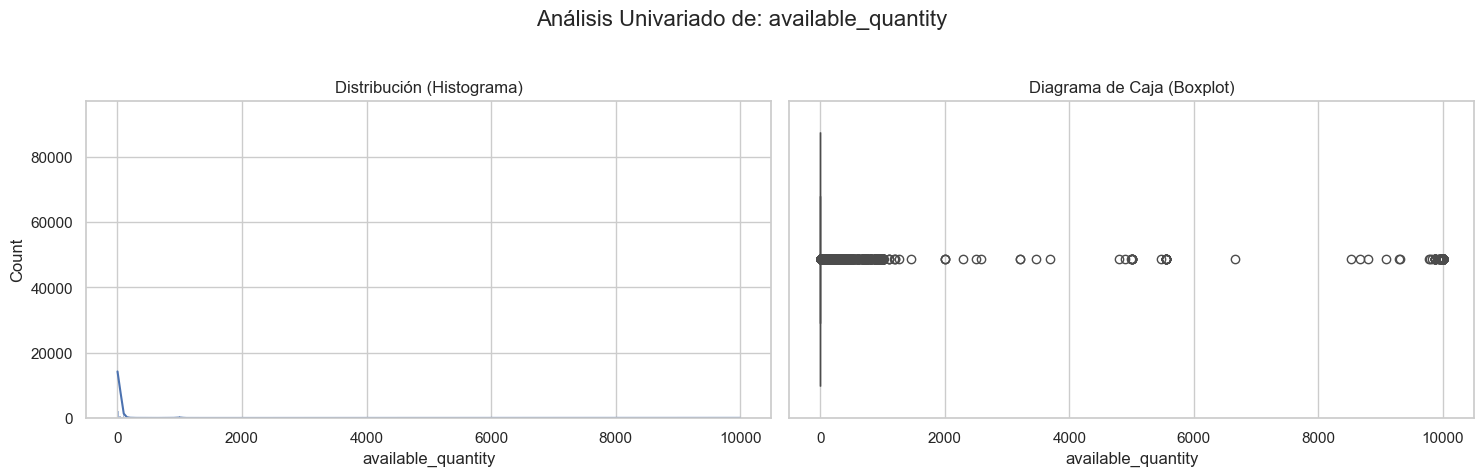

In [ ]:
plot_univariate_numerical(df_convert, 'available_quantity')

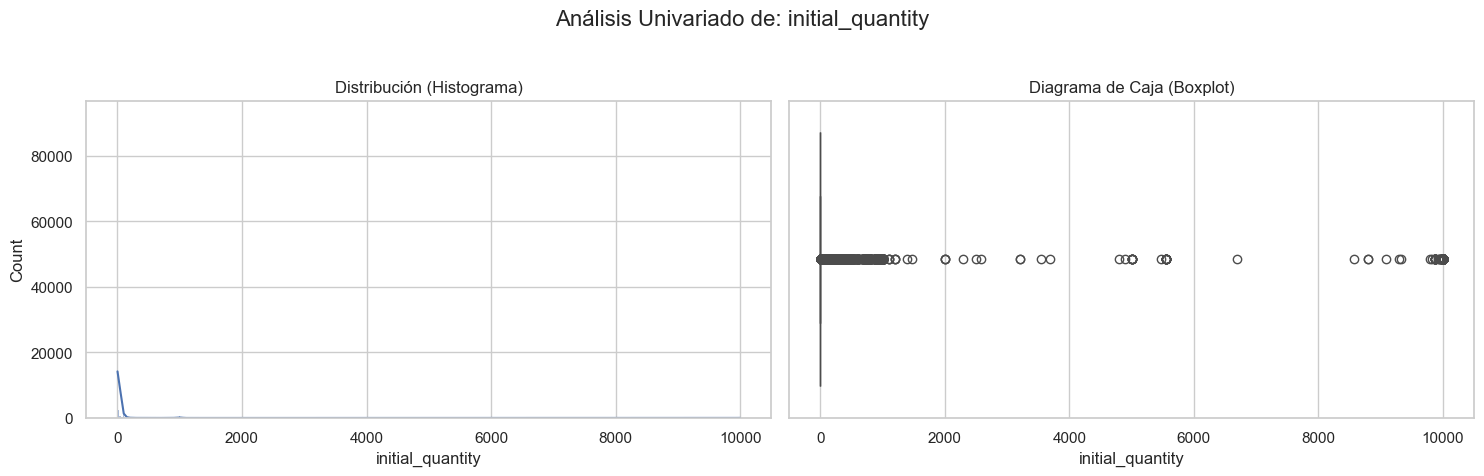

In [31]:
plot_univariate_numerical(df_convert, 'initial_quantity')


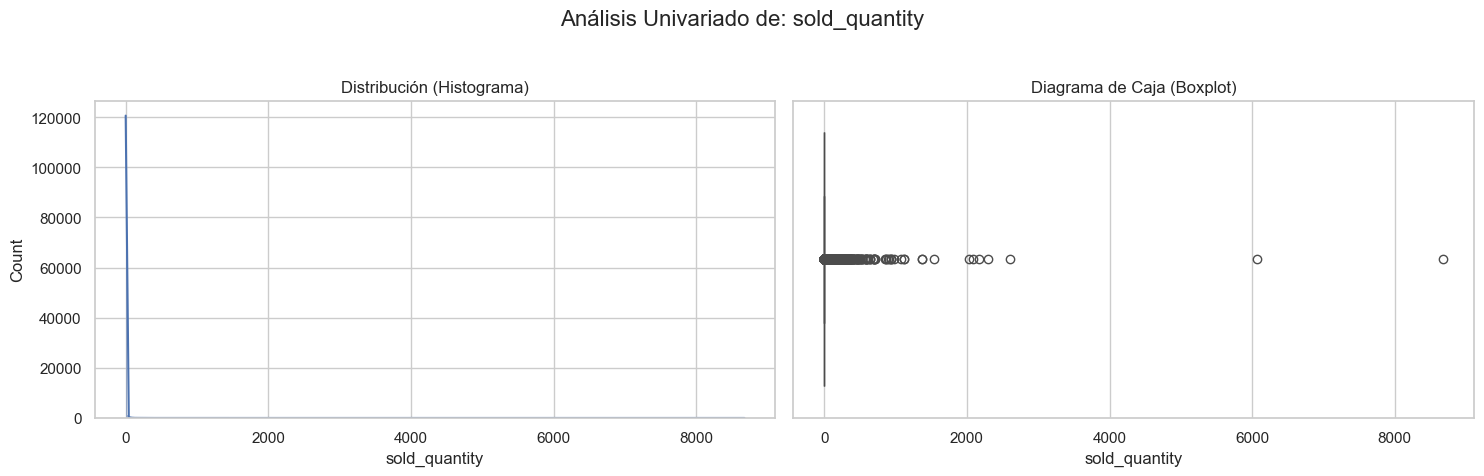

In [32]:

plot_univariate_numerical(df_convert, 'sold_quantity')

Lo que se observaba anteriormente de las variables numéricas en tablas a través de los percentiles, quea expuesto a través de los gráficos. Donde es inminente la presencia de valores atípicos que deben ser tratados con mayor precaución para posteriores analisis.

In [34]:
categorical_boolean_cols = df.select_dtypes(include=['category', 'bool', 'object']).columns.tolist()
categorical_boolean_cols

['seller_address',
 'warranty',
 'sub_status',
 'condition',
 'deal_ids',
 'shipping',
 'non_mercado_pago_payment_methods',
 'variations',
 'site_id',
 'listing_type_id',
 'attributes',
 'buying_mode',
 'tags',
 'listing_source',
 'parent_item_id',
 'coverage_areas',
 'category_id',
 'descriptions',
 'last_updated',
 'international_delivery_mode',
 'pictures',
 'id',
 'accepts_mercadopago',
 'currency_id',
 'thumbnail',
 'title',
 'automatic_relist',
 'date_created',
 'secure_thumbnail',
 'status',
 'video_id',
 'permalink']

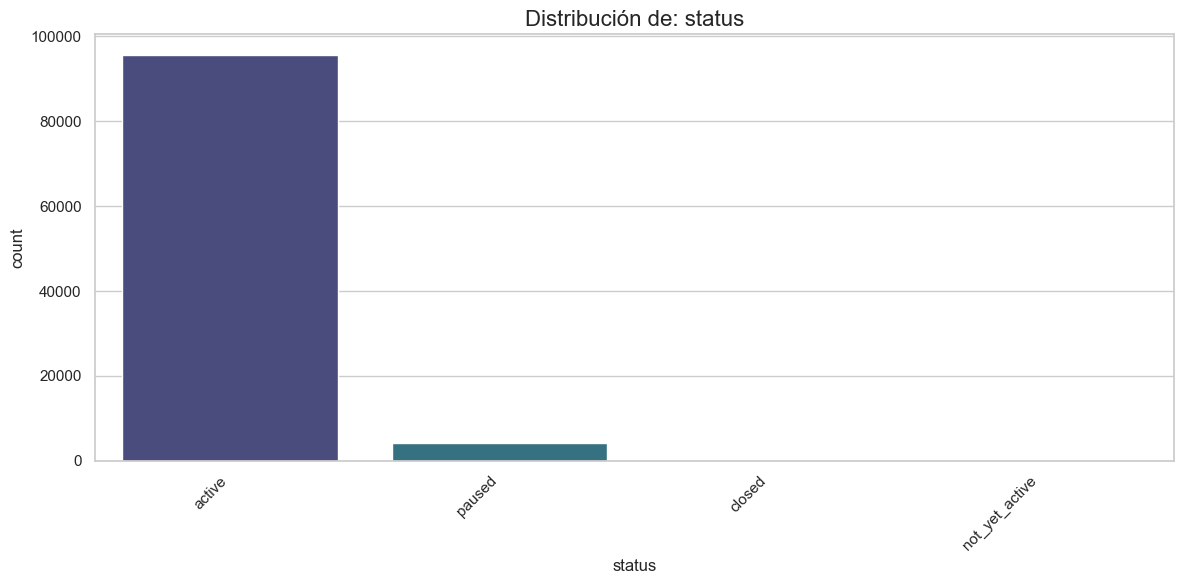

In [37]:
plot_univariate_categorical(df_convert, 'status')

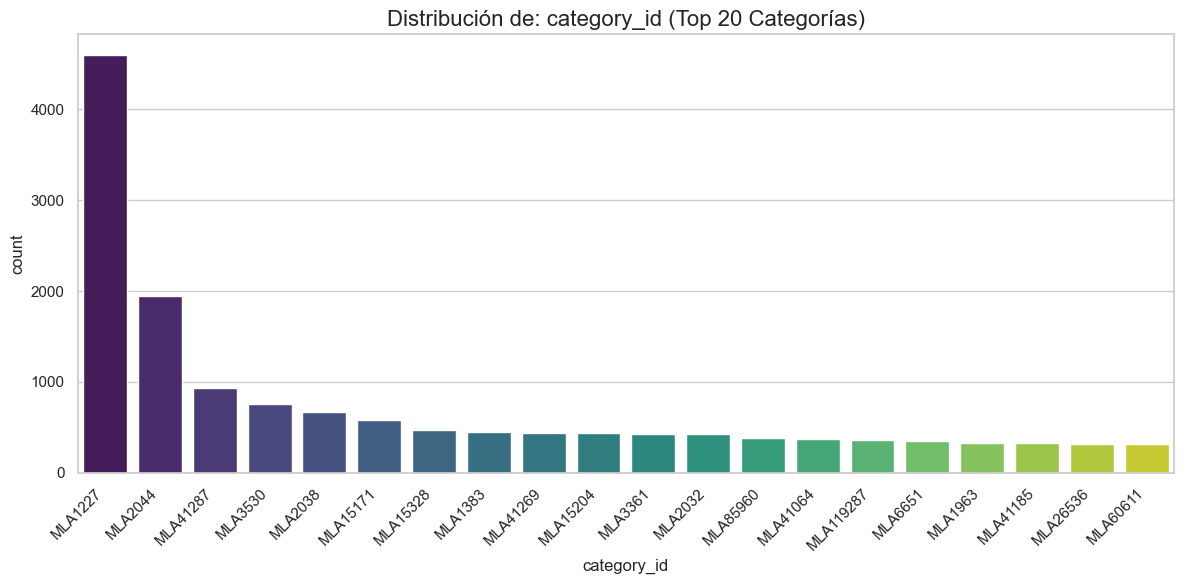

In [38]:
plot_univariate_categorical(df_convert, 'category_id')


Se puede observar una concentración de los datos en ciertas categorías, puntualemnte estas que aparecen al inicio corresponden a categorías de obras literarias o libros. Será interesante ver en un analisis bivariado como se relacionan cada una de ellas con el target new or used

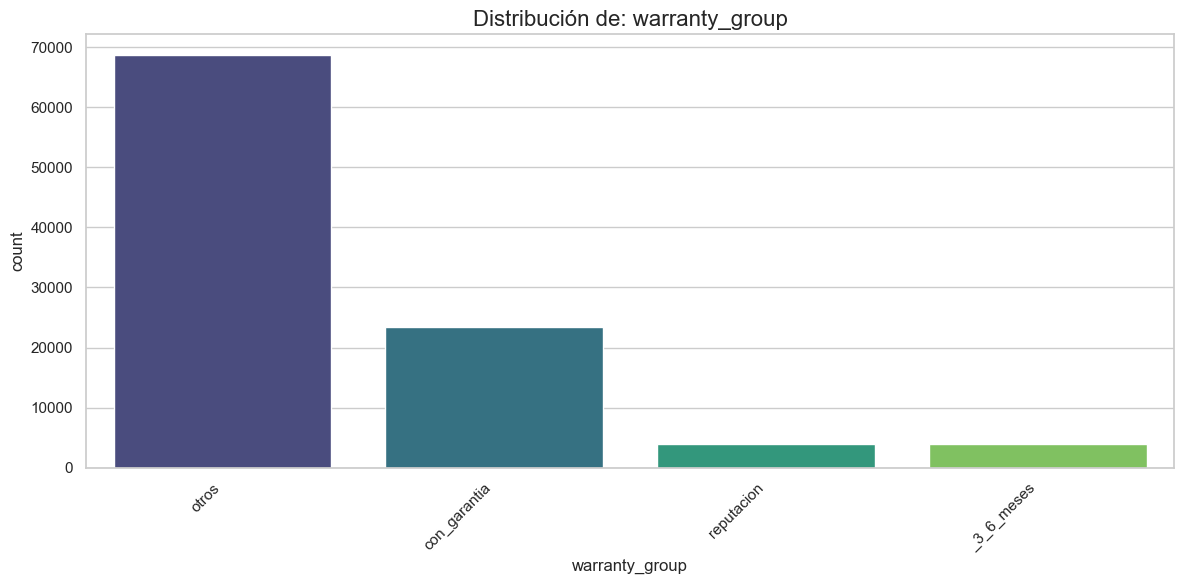

In [43]:
plot_univariate_categorical(df_convert, 'warranty_group')


# 5. Analisis bivariado

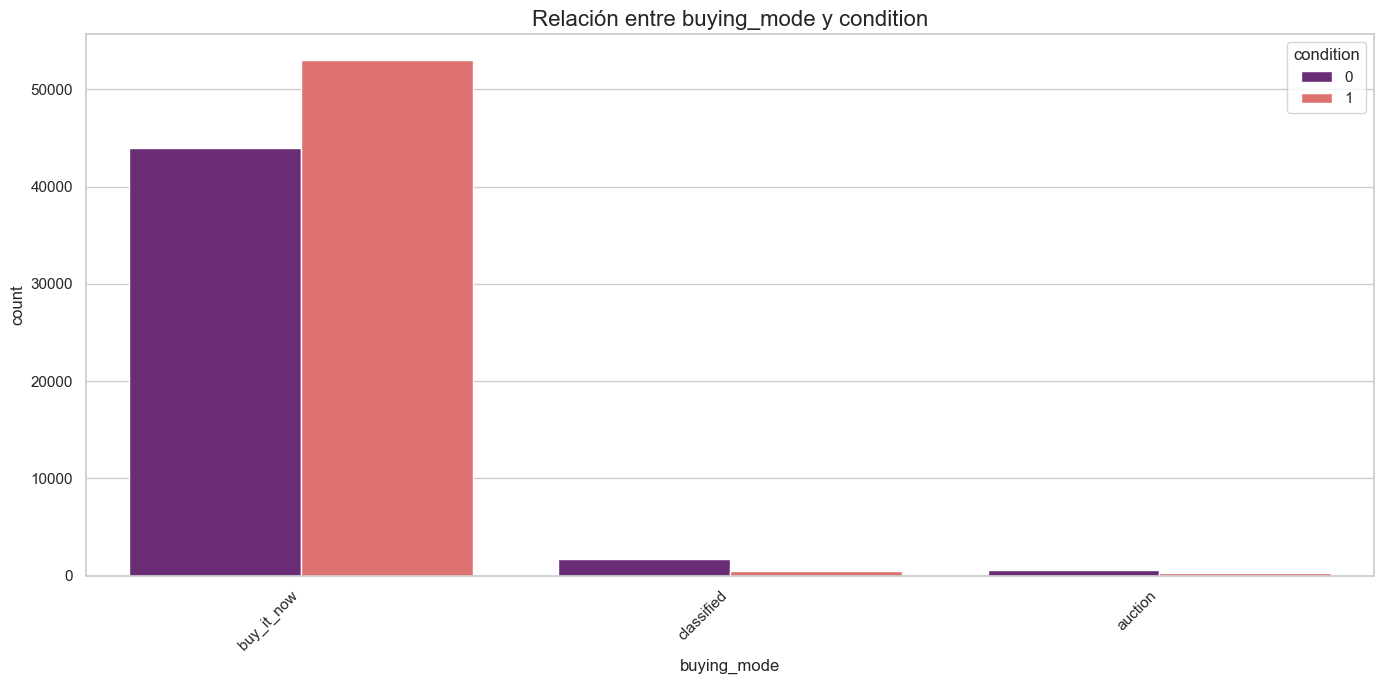

In [44]:
plot_bivariate_cat_cat(df_convert, 'buying_mode', 'condition')

Se observa una ligera correlación entre el buying_mode y la condicion del items. 
Por ejemplo, aquellos que son para comprar_ahora tienen ligera prelevancia a ser items nuevos. Mientras que classified y auction ligeramente la clase usados en mayor

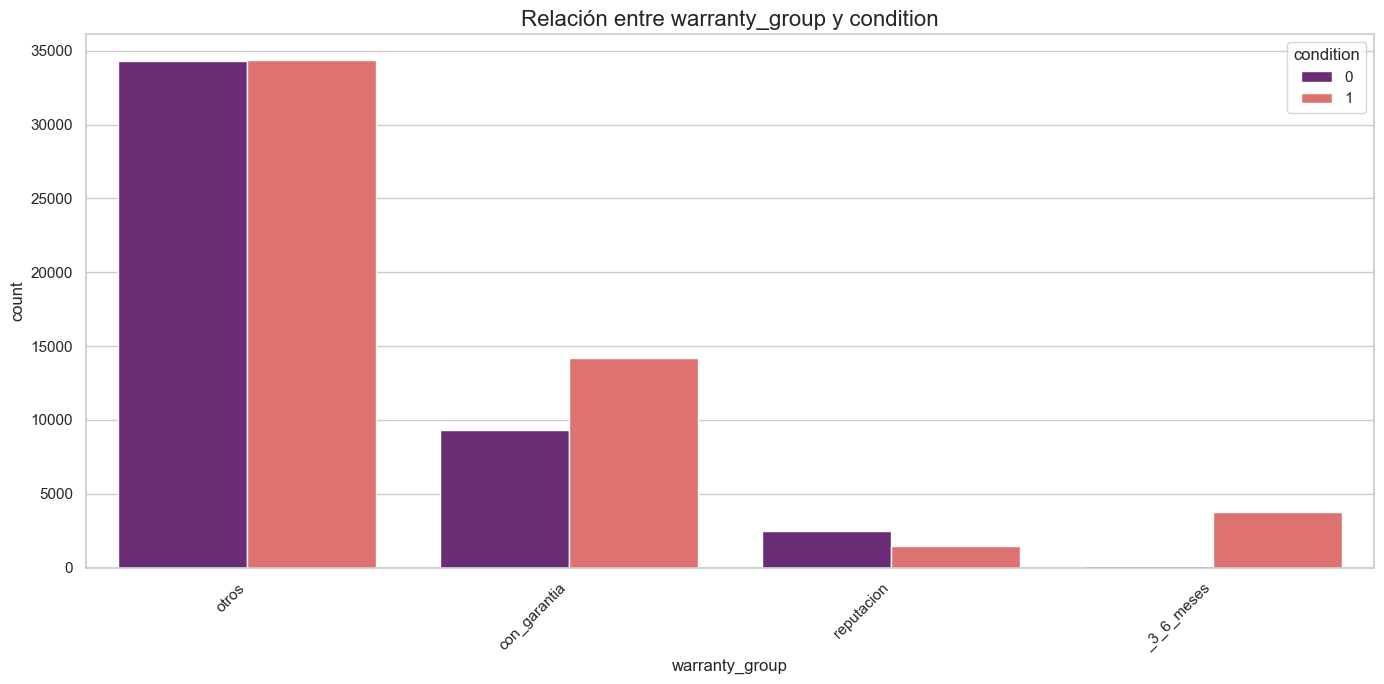

In [45]:
plot_bivariate_cat_cat(df_convert, 'warranty_group', 'condition')


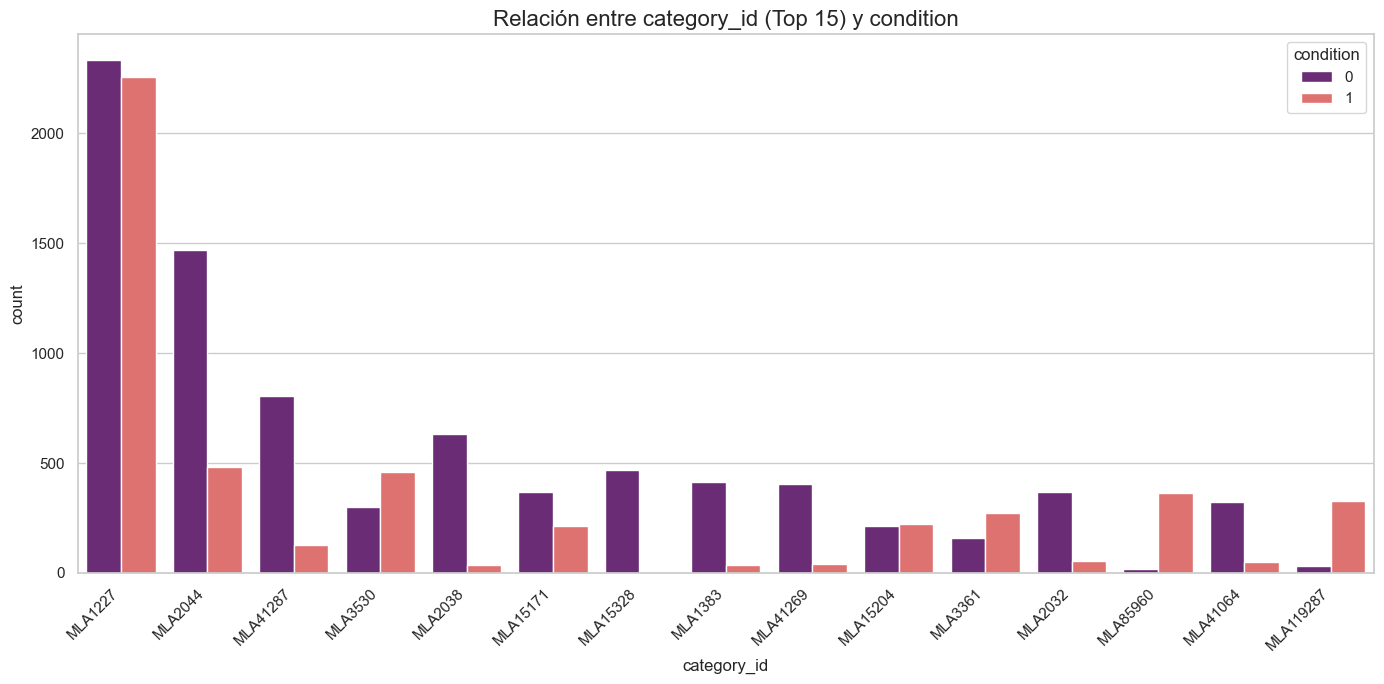

In [46]:
plot_bivariate_cat_cat(df_convert, 'category_id', 'condition')


En esta grafica es claro que muchas de las categorias influye en la condicion del item. Es decir, hay categorías que son predispuestas para vender solo articulos suados com por ejemplos "MLA2038", que es relacionada con Discos Discograficos. Esta variable sin duda es relevante para la determinación de la condición del item. 

Asimismo, es curioso como dentro de la misma categoría de libros (las 3 primeras), ciertas subcategorías dento de esta rama son mas predispuestas a items usados que otras. 

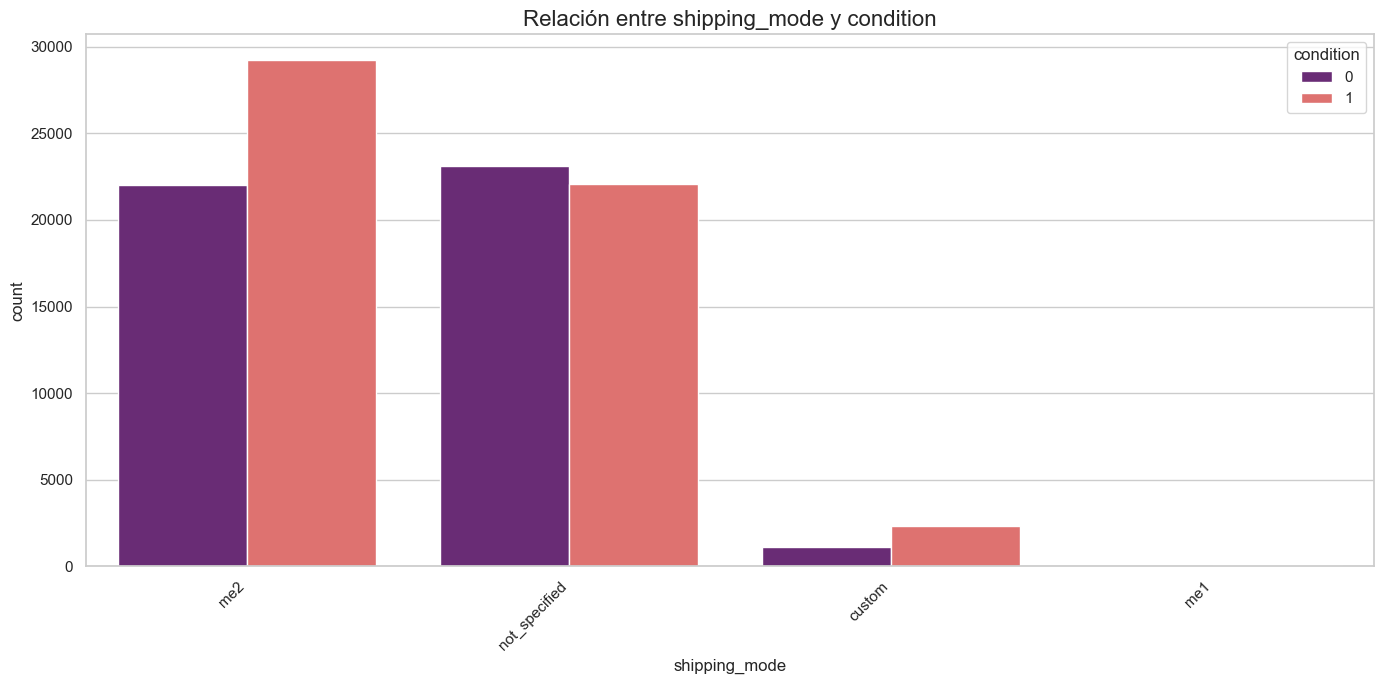

In [51]:
plot_bivariate_cat_cat(df_convert, 'shipping_mode', 'condition')


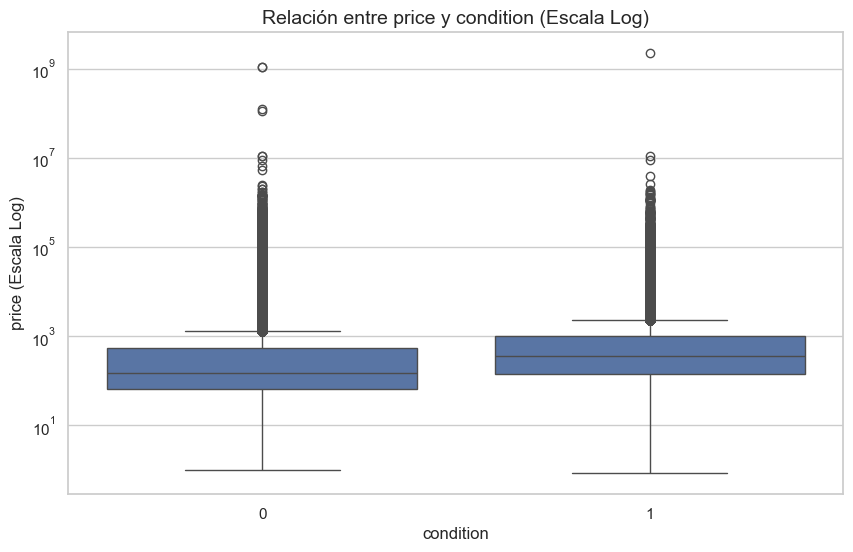

In [75]:
plot_bivariate_cat_num(df_convert, 'condition', 'price', log_scale=True)

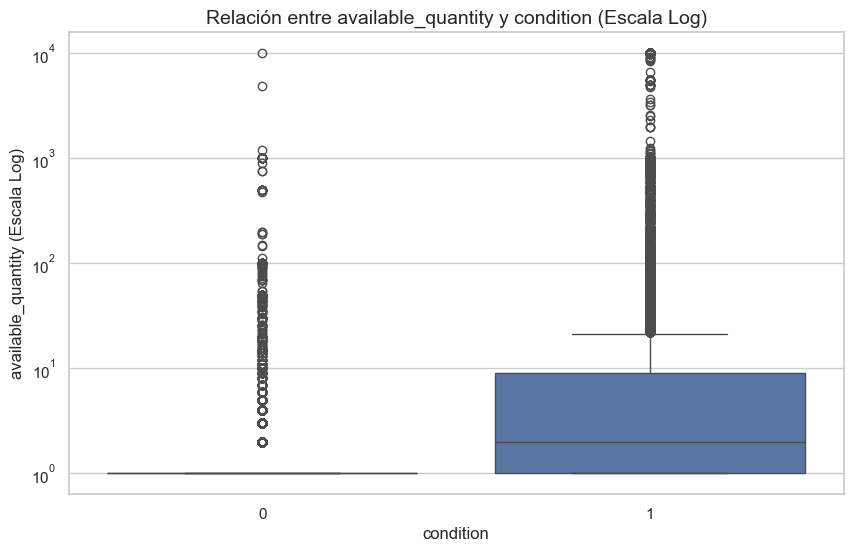

In [76]:
plot_bivariate_cat_num(df_convert, 'condition', 'available_quantity', log_scale=True)


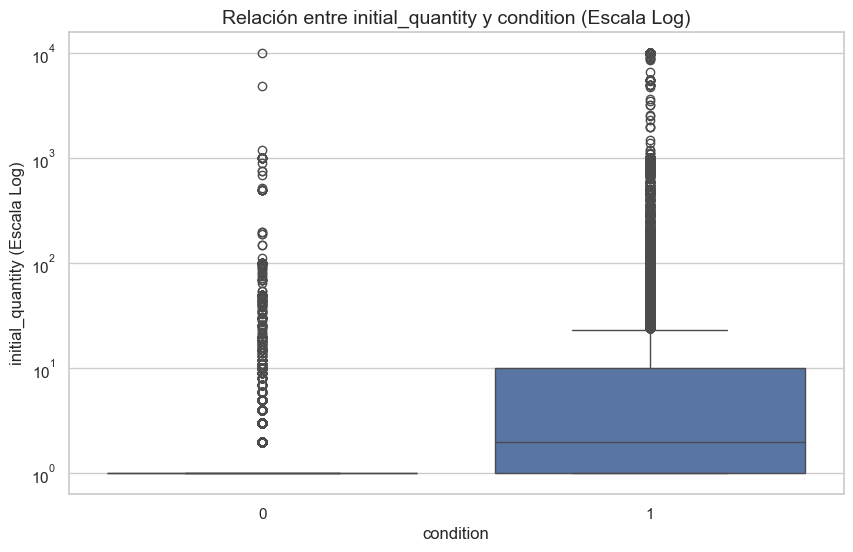

In [77]:
plot_bivariate_cat_num(df_convert, 'condition', 'initial_quantity', log_scale=True)


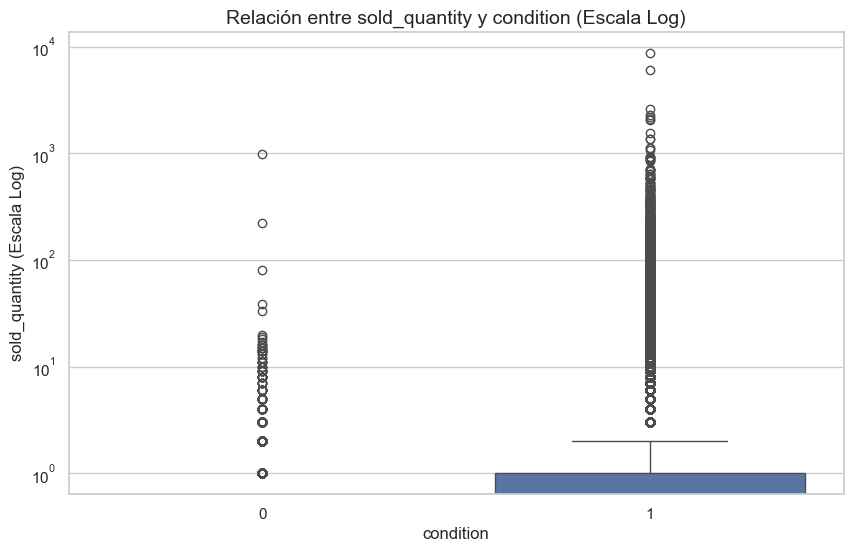

In [93]:
plot_bivariate_cat_num(df_convert, 'condition', 'sold_quantity', log_scale=True)


A traves de los analisis bivariados de caracteristicas numericas contra la variable objetivo, se puede observar que las variables numericas tienen una tendencia a ser mayores en los items nuevos.
Esto es esperable, ya que los items nuevos generalmente tienen un precio más alto y una cantidad inicial disponible y availability mayor en comparación con los items usados. 


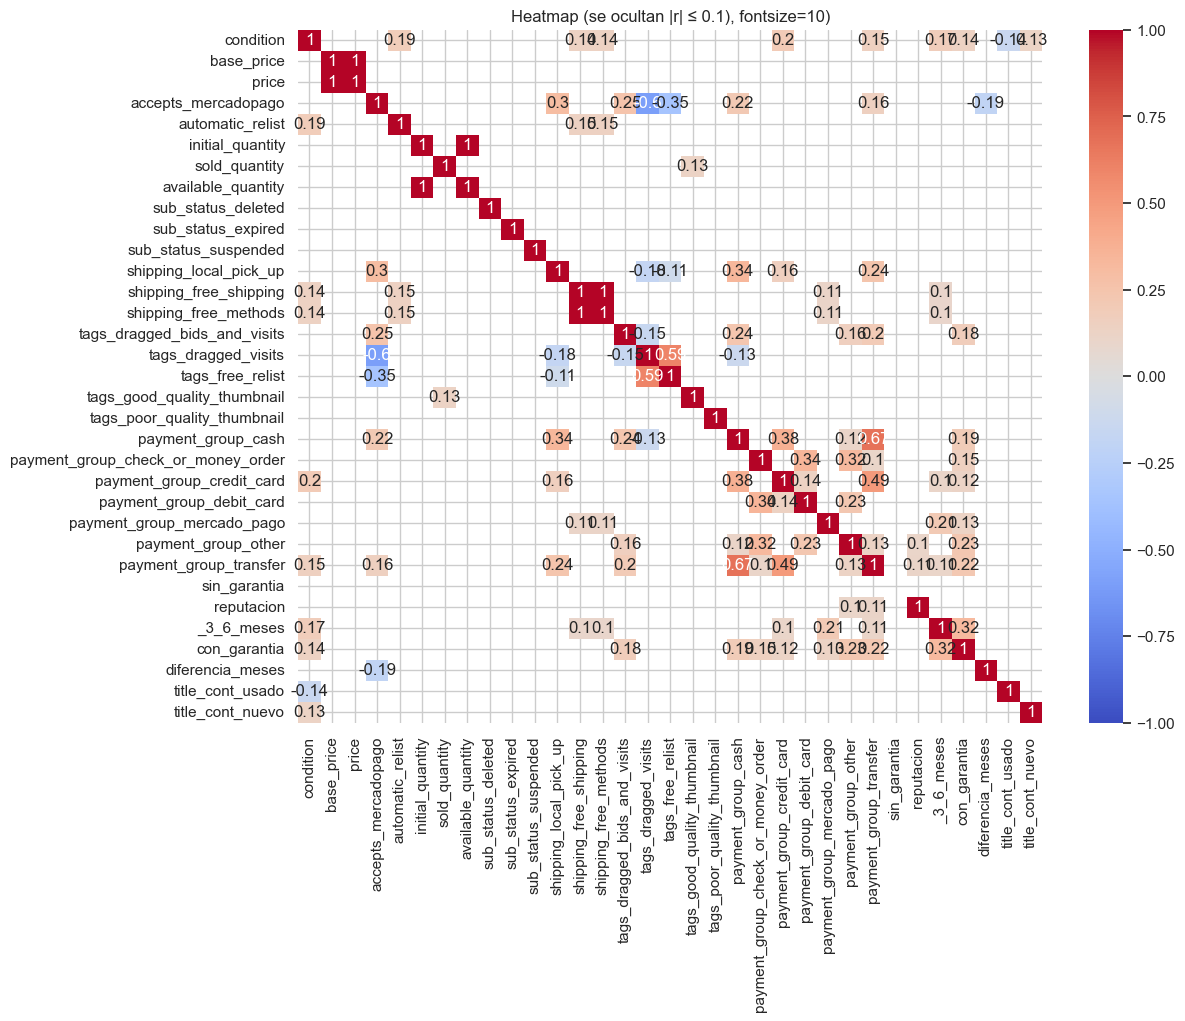

In [72]:
# Extraer columnas numericas y boleanas para el heatmap
num_boolean_cols = df_convert.select_dtypes(include=['number', 'bool']).columns.tolist()
cor = df_convert[num_boolean_cols].corr()
th = 0.1
mask = cor.abs() < th        # True donde queremos ocultar

plt.figure(figsize=(12, 9))
sns.heatmap(
    cor,
    mask=mask,
    annot=True,
    cmap="coolwarm",
    vmin=-1, vmax=1, center=0, 
)
plt.title(f"Heatmap (se ocultan |r| ≤ {th}), fontsize=10)")
plt.show()

Se logra observar como se correlacionan con la variable objetivo condition, las variables boleanas. variables como tipo de envio, tipo de metodo de pago y la garantia del producto pueden inlfuir en determinar la condición del item. Curiosamente o esperadamente, estas variables posteriormente también fueron seleccionadas como gran predictoras por el modelo de RamdonForest

# Conclusiones

A través del proceso de exploración de datos para los items del Marketplace de Mercado Libre se pudo evidenciar que la variable objetivo se encuentra balanceada, esto facilita el proceso de entenamiento de los modelos al no iser necesario la implementación de técnicas de remuestreo o castigo de clases predominantes. 

De igual forma, se logro comprobar la calidad y estructura de los datos, los cuales tenían una mezcla entre columnas numéricas, categoricas y campos anidados como JSON. Los cuales fueron necesarios implementar técnicas de serialización para expandir su contenido, enconrandose columnas con cierto valor predictivo como por ejemplo el payment_method y shipping_mode.

En el analisis exploratorio también se pudo confirmar que las variables numéricas como el precio, cantidad de items y availability tienden a ser mayores en los items nuevos, lo que era esperado dado que un producto nuevo generalmente su precio es mayor en su categoría referente a un producto similar dentro de la categoría. A excepsiones de antiguedades cuyo valor puede que aumente con el tiempo.
También, se evidenció que el método de pago, tipo de envío, asi como la garantia y tags (en menor medida) aportan información relevante para la condición del producto. 
Otro gran descubrimiento fue que la categoría del producto influye fuertemente en la condición; por ejemplo, ciertas categorías como discos discograficos tienen una mayor proporción de artículos usados.

Finalmente, a partir de la creación de nuevas variables en el análisis como agruaciones de metodo de pago, flags de las palabras relacionadas a nuevo o usado en el titulo y grupos de garantía se enriqueció el dataset y mejoró la capacidad predictiva del modelo. 

En resumen, el Analisis EDA permitió entender la estructura y calidad de los datos, identificar las variables más relevantes y descrubir relaciones claves para el problema de rpedicción de la condición o estado de los item del marketplace de Mercado Libre. El dataset resultante está en optimas condiciones para ser usado en la construcción de modelos de machine learning robustos que apoyen a la toma de decisiones en el negocio.
